<a href="https://colab.research.google.com/github/ncc-chandni/Projects/blob/main/CustomerAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading Data

In [7]:
data = pd.read_csv("/content/Marketing-Customer-Value-Analysis.csv")
data.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [8]:
data.Response = data.Response.apply(lambda X : 0 if X == 'No' else 1)
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3. EDA

In [9]:
data.shape

(9134, 24)

In [10]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
data.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
data.isnull()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## 4. Analytics on Engaged Customers
Analyze how different customers behave and react to different marketing strategies

4.1 Overall Engagement Rate

Response field contains information about whether a customer responded to marketing efforts

In [14]:
# total no of customers who have responded

data.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

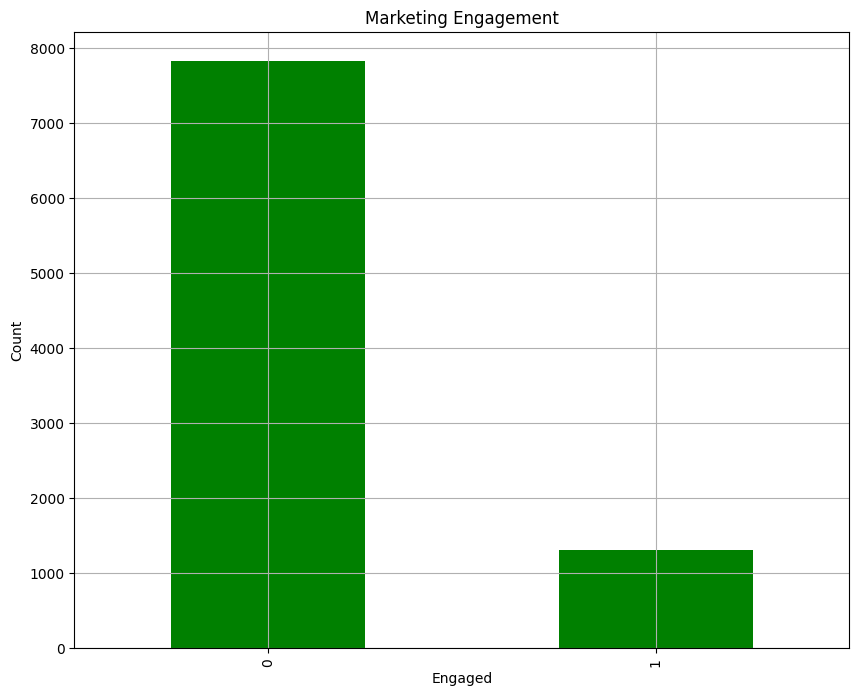

In [18]:
#Visualizing this

ax= data.groupby('Response').count()['Customer'].plot(kind = 'bar',
                                                      color = 'green',
                                                      grid = True,
                                                      figsize = (10,8),
                                                      title = 'Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [20]:
# % of engaged and non engaged

data.groupby('Response').count()['Customer']/data.shape[0]*100

Response
0    85.679877
1    14.320123
Name: Customer, dtype: float64

Only 14% of customers have responded the marketing calls and 86% have not responded

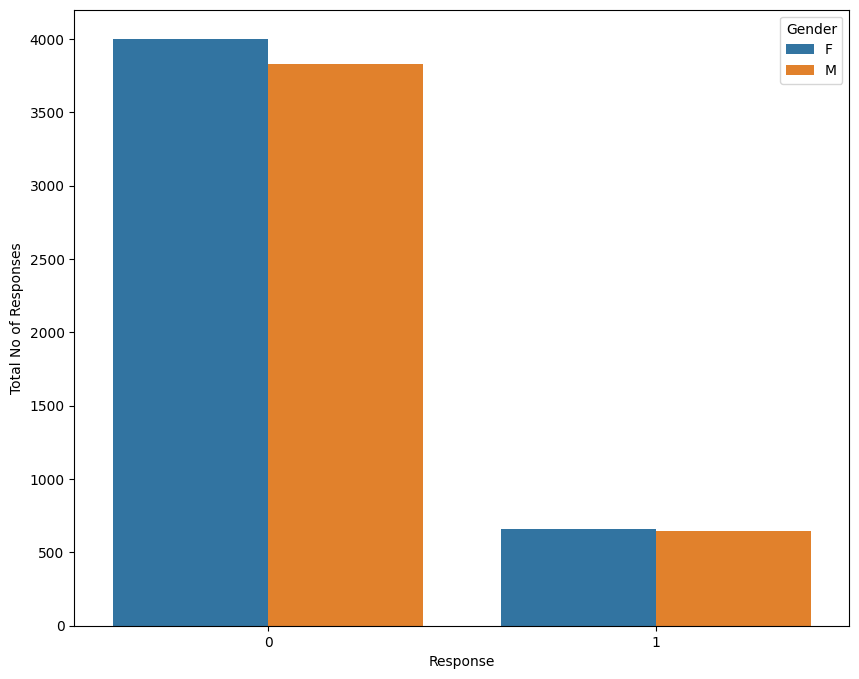

In [30]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Response', hue='Gender', data = data)
plt.ylabel('Total No of Responses')
plt.show()

Ratio of male and female for responding to a marketing call is almost same

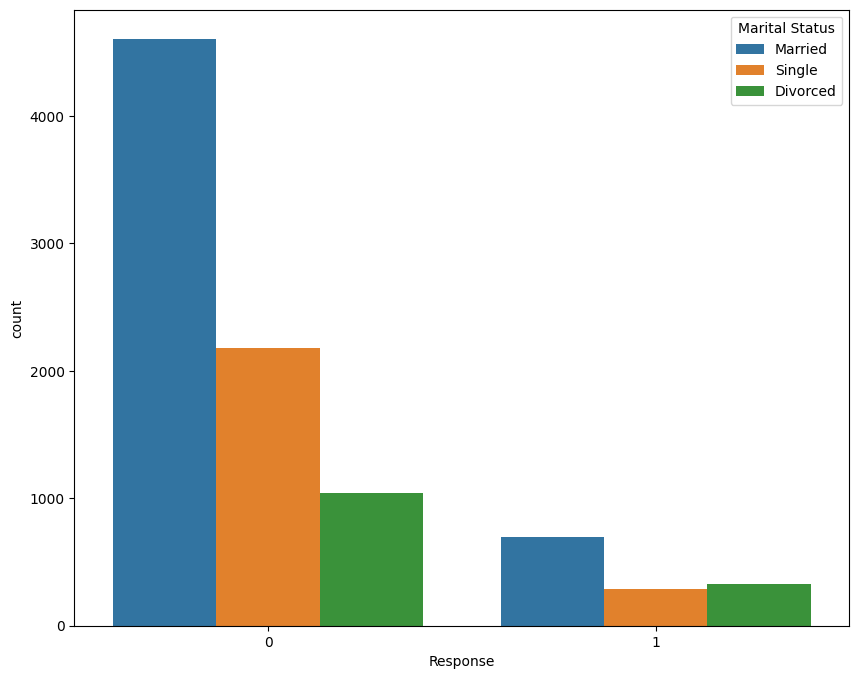

In [32]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x= 'Response', hue = 'Marital Status', data = data)
plt.show()

In [35]:
data.groupby('Marital Status').count()['Customer']/data.shape[0]*100

Marital Status
Divorced    14.987957
Married     58.003065
Single      27.008977
Name: Customer, dtype: float64

majority are married and accordingly their response rate is also high

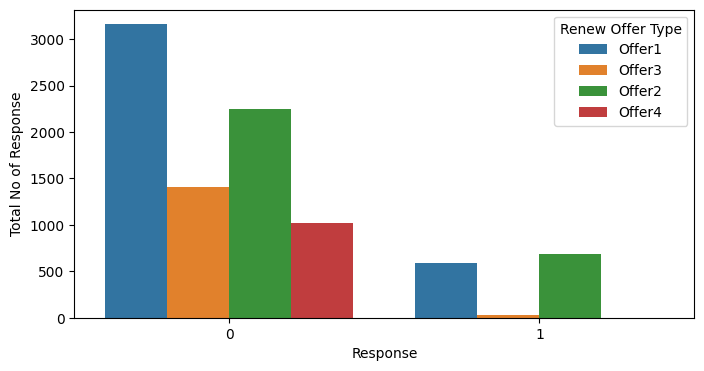

In [37]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Response',hue= 'Renew Offer Type', data = data)
plt.ylabel('Total No of Response')
plt.show()

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

Response Rate by Education

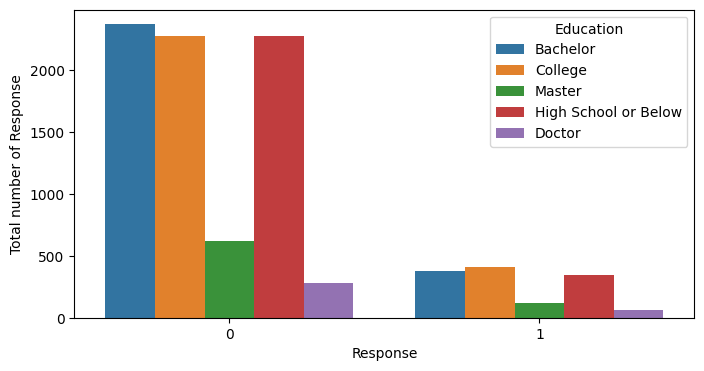

In [38]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Response',hue = 'Education' ,data = data)
plt.ylabel('Total number of Response')
plt.show()


In [39]:
data.groupby('Education').count()['Customer']/data.shape[0]*100

Education
Bachelor                30.085395
College                 29.351872
Doctor                   3.744252
High School or Below    28.705934
Master                   8.112547
Name: Customer, dtype: float64

Notice that customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

Response Rate by Sales Channel

In [41]:
data.groupby('Sales Channel').count()['Customer']/data.shape[0]*100

Sales Channel
Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: Customer, dtype: float64

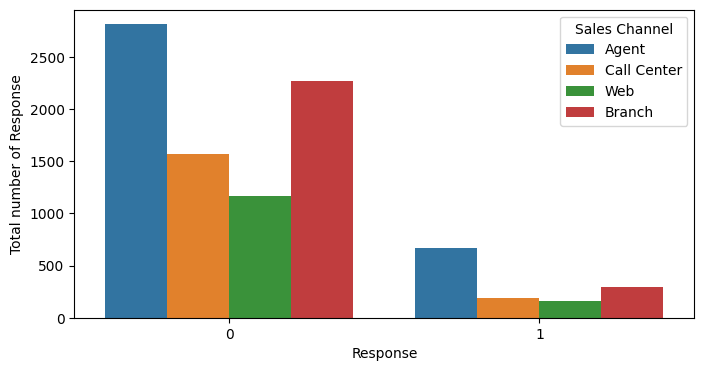

In [40]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Response',hue = 'Sales Channel' ,data = data)
plt.ylabel('Total number of Response')
plt.show()


Response Rate by Total Claim Amount

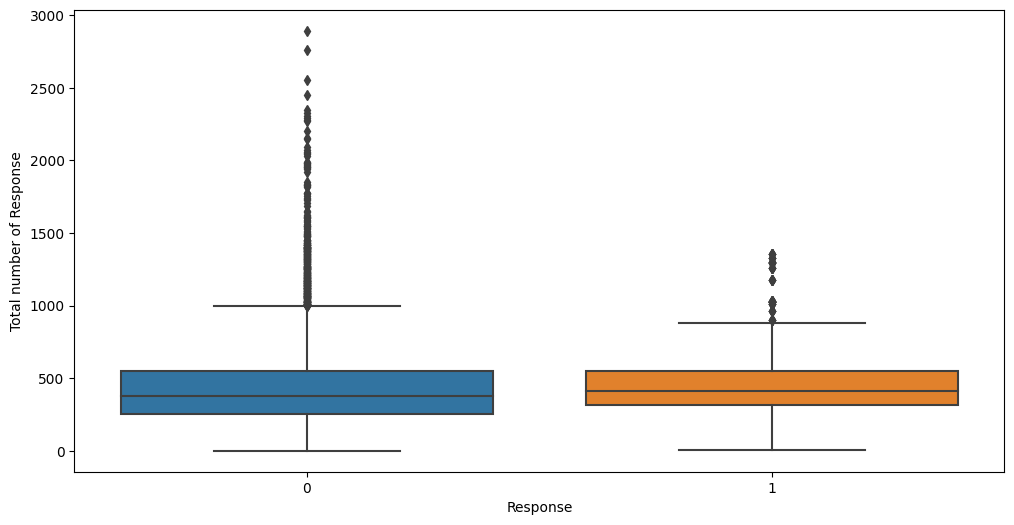

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = data)
plt.ylabel('Total number of Response')
plt.show()

Box plots are a great way to visualize the distribuation of countinous variables. They show the min, max, first quatile, meadian and third quartile, all in one view. The central rectangle spans from the first quartile to the third quartile, and the green line shows the median. The lower and upper ends show the minimum and the maximum of each distribution.

The dots above the upper boundry line show the suspected outliers that are decided based on the INterquartile range (IQR). The points that fall 1.5IQR above the third quartile or 1.5IQR below the quartile are suspected outliers and are drawn with the dots

Response Rate by Income Distribution

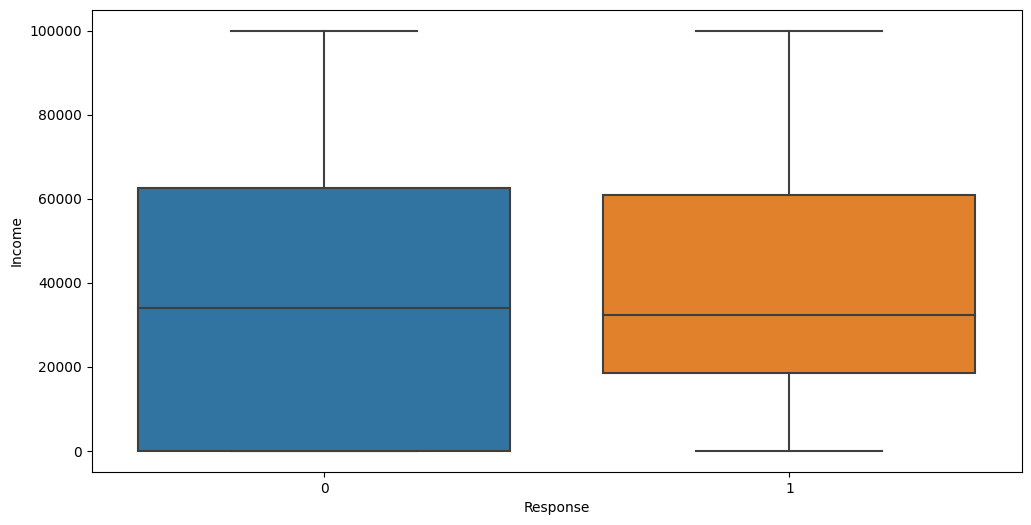

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = data)
plt.show()


Response Rate by Employment Status

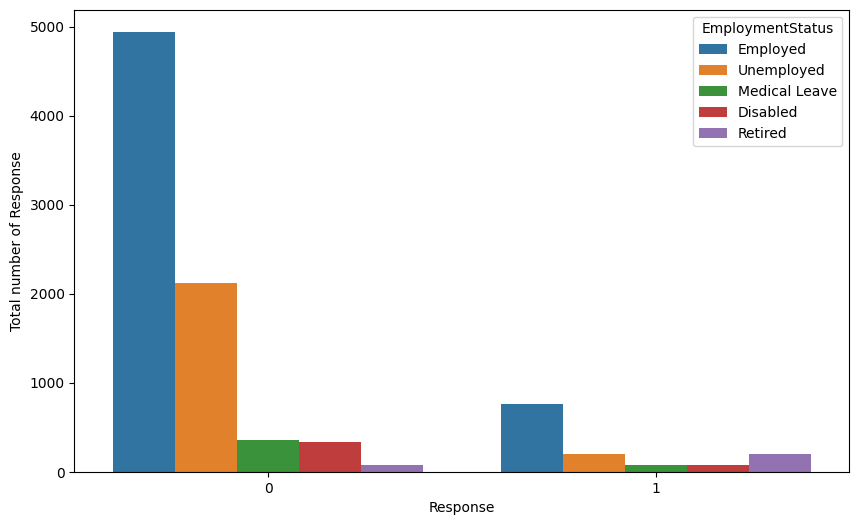

In [45]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Response',hue = 'EmploymentStatus' ,data = data) # Show box plot Response and EmploymentStatus.
plt.ylabel('Total number of Response')
plt.show()


Response rate by vehicle class

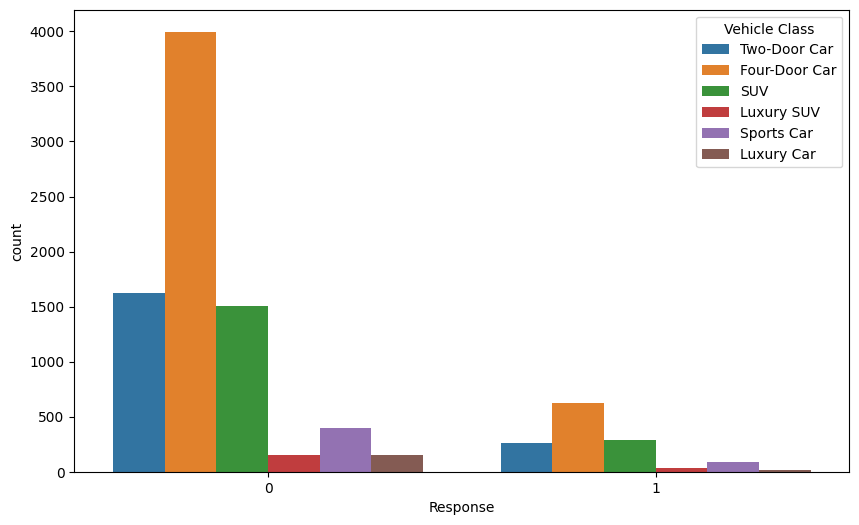

In [47]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Response',hue = 'Vehicle Class' ,data = data)
plt.show()

Response Rate by Policy

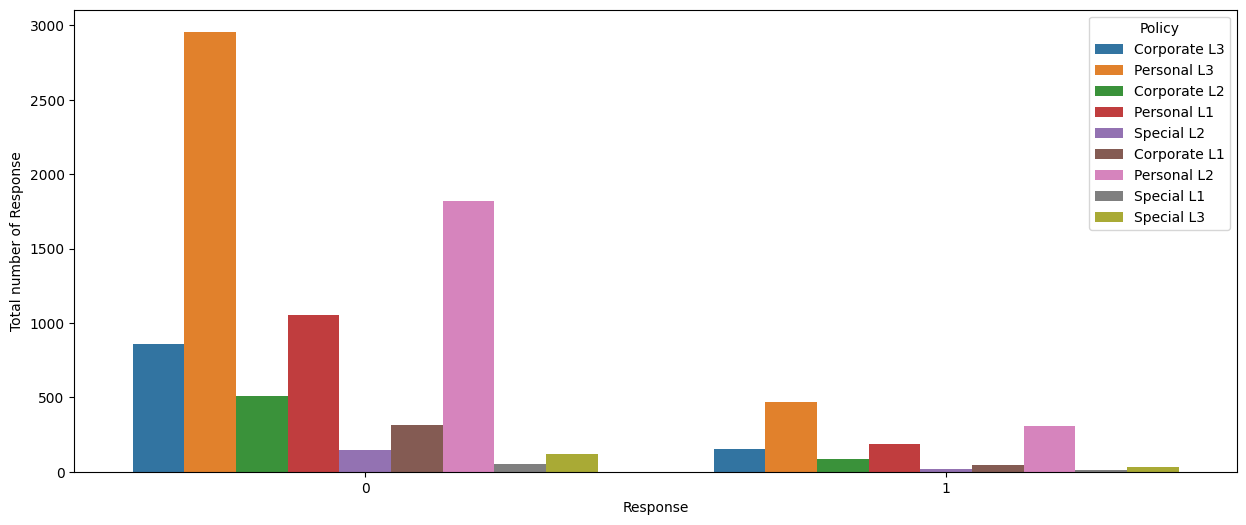

In [48]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Response',hue = 'Policy' ,data = data)
plt.ylabel('Total number of Response')
plt.show()


## 5. Regression Analysis with Countinouse Variables only

In [49]:
import statsmodels.api as sm

In [50]:
continous_var_df = data.select_dtypes(include=['int64','float'])
continous_var_df.nunique()#returns no of unique values

Customer Lifetime Value          8041
Response                            2
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
dtype: int64

In [51]:
continous_var_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [52]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()  # Print Summary

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                -0.02546
Time:                        07:34:57   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

By looking at the p-value of 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.

What Are P Values?

P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

High P values: your data are likely with a true null.
Low P values: your data are unlikely with a true null
A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.



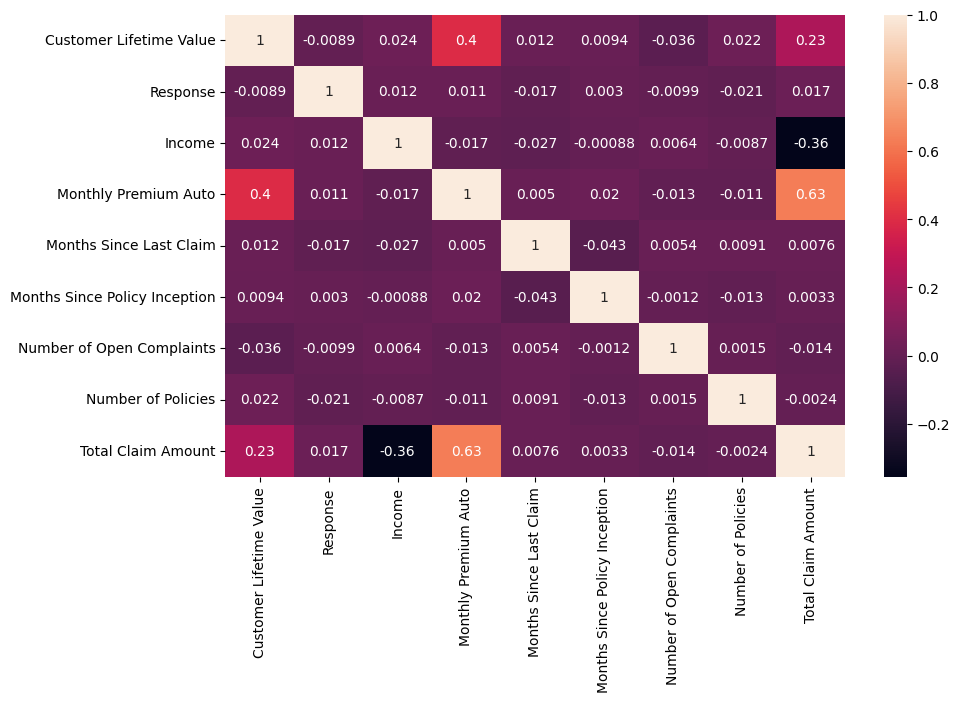

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

## 6. Regression Analysis with Categorical Values only

In [54]:
categorical_df = data.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)

In [55]:
cat_df.nunique()

State               5
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy Type         3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
Vehicle Size        3
dtype: int64

In [56]:
cols = cat_df.columns
cols

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])


In [58]:
cat_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,1,1,0,2,1,3,0,0,0,1


In [59]:
categorical_train = sm.Logit(continous_var_df.Response, cat_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.387557
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9121
Method:                           MLE   Df Model:                           12
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                 0.05642
Time:                        08:30:50   Log-Likelihood:                -3539.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.224e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0256      0.023     -1.122      0.262      -0.070       0.019
Coverage            -0.0639      0.046     -1.390      0.164      -0.154       0.026
Education            0.0088      0.022      0.409      0.683      -0.033       0.051
EmploymentStatus    -0.0459      0.024     -1.951      0.051      -0.092       0.000
Gender               0.0466      0.060      0.774      0.439      -0.071       0.165
Location Code       -0.0477      0.047     -1.014      0.311      -0.140       0.045
Marital Status      -0.4643      0.047     -9.816      0.000      -0.557      -0.372
Policy Type          0.1736      0.132      1.311      0.190      -0.086       0.433
Policy              -0.0751      0.037     -2.033      0.042      -0.147      -0.003
Renew Offer Type    -0.5681      0.037    -15.226      0.000      -0.641      -0.495
Sales Channel       -0.2150      0.030     -7.148      0.000      -0.274      -0.156
Vehicle Class        0.0201      0.015      1.381      0.167      -0.008       0.049
Vehicle Size        -0.3355      0.052     -6.398      0.000      -0.438      -0.233
====================================================================================
"""

By looking at p-value,'Marital Status','Renew Offer type','Sales channel','Vehicle size','policy' variables are significant at 0.05 significance level, and all of them have negative relationship with the output variable, Response

## 7. Regression Analysis with both Continous and Categorical Variables

In [60]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)

In [61]:
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)

In [62]:
all_data_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,0,56274,69,32,5,0,1,384.811147,4,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,0,94,13,42,0,8,1131.464935,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,0,48767,108,18,38,0,2,566.472247,2,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,0,106,18,65,0,7,529.881344,1,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,0,43836,73,12,44,0,1,138.130879,4,...,1,1,0,2,1,3,0,0,0,1


In [63]:
total_train = sm.Logit(all_data_df.Response, all_data_df.drop(['Response'], axis = 1))   # Logit Model
total_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.384709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9113
Method:                           MLE   Df Model:                           20
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                 0.06336
Time:                        08:32:15   Log-Likelihood:                -3513.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.066e-88
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.183e-05   5.11e-06     -2.317      0.021   -2.18e-05   -1.82e-06
Income                         3.347e-06   1.39e-06      2.411      0.016    6.26e-07    6.07e-06
Monthly Premium Auto             -0.0033      0.001     -2.471      0.013      -0.006      -0.001
Months Since Last Claim          -0.0053      0.003     -1.780      0.075      -0.011       0.001
Months Since Policy Inception    -0.0019      0.001     -1.830      0.067      -0.004       0.000
Number of Open Complaints        -0.0569      0.035     -1.622      0.105      -0.126       0.012
Number of Policies               -0.0392      0.013     -3.013      0.003      -0.065      -0.014
Total Claim Amount                0.0007      0.000      4.448      0.000       0.000       0.001
State                            -0.0084      0.023     -0.357      0.721      -0.054       0.038
Coverage                         -0.0325      0.053     -0.615      0.538      -0.136       0.071
Education                         0.0235      0.022      1.068      0.285      -0.020       0.067
EmploymentStatus                 -0.0232      0.030     -0.763      0.445      -0.083       0.036
Gender                            0.0584      0.061      0.950      0.342      -0.062       0.179
Location Code                    -0.0894      0.053     -1.696      0.090      -0.193       0.014
Marital Status                   -0.4645      0.048     -9.585      0.000      -0.559      -0.370
Policy Type                       0.1085      0.135      0.806      0.420      -0.155       0.372
Policy                           -0.0335      0.039     -0.864      0.388      -0.110       0.043
Renew Offer Type                 -0.5828      0.039    -15.136      0.000      -0.658      -0.507
Sales Channel                    -0.1937      0.030     -6.354      0.000      -0.253      -0.134
Vehicle Class                     0.0287      0.015      1.897      0.058      -0.001       0.058
Vehicle Size                     -0.2837      0.055     -5.161      0.000      -0.391      -0.176
=================================================================================================
"""

By looking at the p-value of 'Customer lifetime value','Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Policies','Total claim amount','Marital Status','Renew offer type','Sales Channel','Vehicle size', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.



## Conclusion:

The higher the Customer Lifetime value is, the less likely that the customer will be response to marketing calls.